<a href="https://colab.research.google.com/github/hidensuport/Hello-story-/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [14]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [12]:
df = pd.read_csv("fraudTest.csv")

FileNotFoundError: ignored

In [11]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [12]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [13]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [5]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

NameError: ignored

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

NameError: ignored

In [8]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

NameError: ignored

In [9]:
X.head()

NameError: ignored

1.0

# 5.) Train a Logistic regression.

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
resample_X = X
resample_y = y
X_normalized = scaler.fit_transform(resample_X)


In [67]:
from sklearn.linear_model import LogisticRegression


In [68]:
log_reg = LogisticRegression().fit(X_normalized, resample_y)

In [90]:
cut = int((len(X)*.8) //1 )
X_train = X[:cut]
X_test = X[cut:]
X_normalized1 = scaler.fit_transform(X_train)
y_train = y[:cut]
y_test = y[cut:]

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

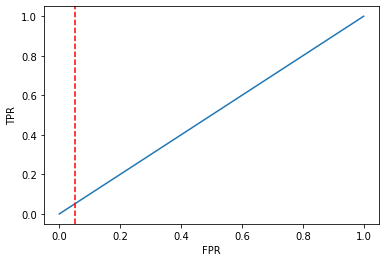

The threshold for a FPR of 5% is:  1.0


In [93]:
from sklearn.metrics import roc_curve
model = LogisticRegression()
model.fit(X_train,y_train)
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

# Assume y_test is the true labels and y_pred_proba is the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Find the threshold that corresponds to a FPR of 5%
desired_threshold = thresholds[np.argmin(np.abs(fpr-0.05))]

# Plot the ROC curve to visualize the threshold
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.axvline(x=0.05, color='red', linestyle='--')
plt.show()

print("The threshold for a FPR of 5% is: ", desired_threshold)

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [101]:
df_temp = df_select.copy()
df_temp = df_temp[:-1]

In [102]:
df_temp["pred"] = log_reg.predict(resample_X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [105]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]
df_temp.head()

,pred,is_fraud,amt
0,0.0,0.0,2.86
1,0.0,0.0,29.84
2,0.0,0.0,41.28
3,0.0,0.0,60.05
4,0.0,0.0,3.19


In [111]:
v =0 
for i in range(len(df_temp)):
  if (df_temp['pred'][i] == df_temp['is_fraud'][i] ):
    v = v + df_temp['amt'][i]*0.02
  else:
    v = v -df_temp['amt'][i]*0.01
v

72892.88110000038

If the company makes .02*amt on True transactions and loses -amt on False then we can get 72892.88 amt which makes our model reliable, company should apply this one

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [113]:
from sklearn.linear_model import Lasso

In [114]:
lasso = Lasso(alpha=1.0)

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.029440582965178597, 0.02175282643590648)

In [115]:
lasso.coef_

array([ 3.19465738e-05, -7.71469980e-10, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

Since most of the coef is 0, the use of lasso data is garbage. I would not use it 